In [1]:
import numpy as np
import networkx as nx
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
%load_ext autoreload
%aimport networks
from networks import RAGraph
%aimport log_bin
# helper functions
%aimport utils
font_size = 20
%autoreload 1

# Fixed N and varying m

In [15]:
# save to file
# fixed_n_df.to_csv('data/ra/degree_distribution1/fixed_n_degrees.csv')

# load from file
fixed_n_df = pd.read_csv('data/ba/degree_distribution1/fixed_n_degrees.csv', index_col=0)
fixed_n_df.columns = fixed_n_df.columns.astype(int)

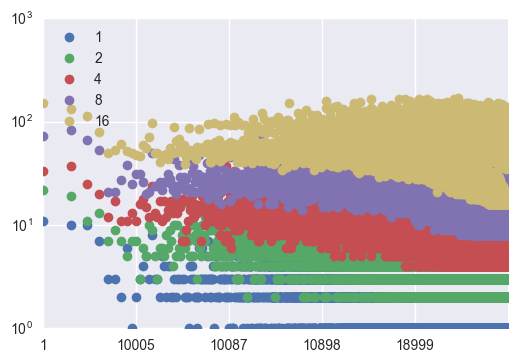

In [16]:
fixed_n_df.plot(style='o', loglog=True)

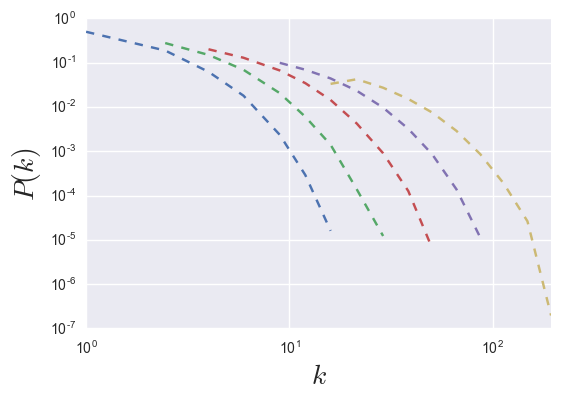

In [21]:
fixed_n_logbin = utils.log_bin_and_plot(fixed_n_df, a=1.3, font_size=font_size)

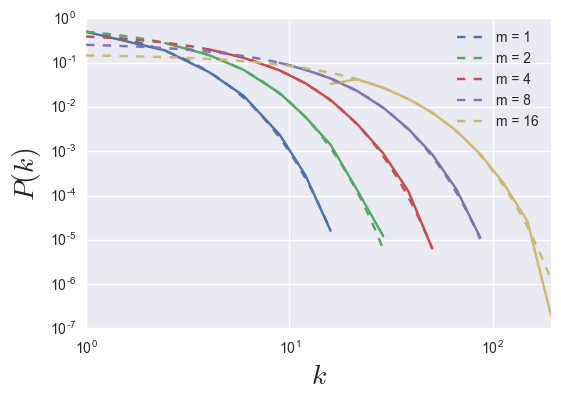

In [64]:
# plot numerical results
utils.log_bin_and_plot(fixed_n_df, a=1.3, font_size=font_size, style='-', loglog=True, label='__nolegend__')

model_df = utils.get_model_df(fixed_n_logbin, fixed_n_logbin.columns, model=utils.deg_dist_ra_theory, index=False)
# plot model
current_palette = sns.color_palette()
for i, col in enumerate(model_df):
    model_df[col].dropna().plot(loglog=True, style='--', color=current_palette[i], label='m = '+str(col))
plt.legend()